# Tooltips, Dialogs and Menu

- [Dialogs Reference](https://www.pythonguis.com/tutorials/pyqt6-dialogs/)
- [Menus Reference](https://www.pythonguis.com/tutorials/pyqt6-actions-toolbars-menus/)


## Tooltips

- Tooltips in PyQt6 provide helpful hints to users about the functionality of various widgets in your application.

  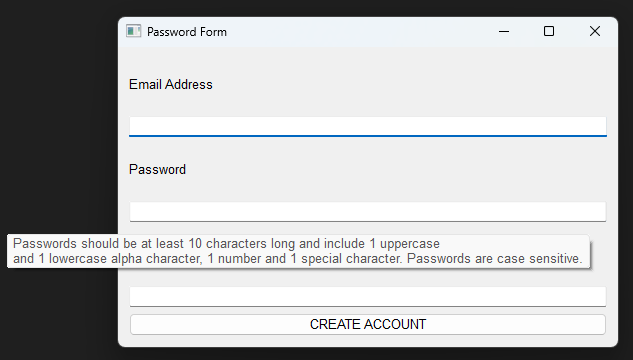

  ```python
  class PasswordForm(QWidget):
      def __init__(self):
          super().__init__()

          self.initUI()

      def initUI(self):
          self.setWindowTitle('Password Form')
          self.setGeometry(100, 100, 500, 300)

          layout = QVBoxLayout()

          self.email_label = QLabel('Email Address')
          layout.addWidget(self.email_label)
          self.email_input = QLineEdit()
          layout.addWidget(self.email_input)

          self.password_label = QLabel('Password')
          layout.addWidget(self.password_label)
          self.password_input = QLineEdit()
          self.password_input.setEchoMode(QLineEdit.EchoMode.Password)
          layout.addWidget(self.password_input)
          self.password_input.setToolTip(
              'Passwords should be at least 10 characters long and include 1 uppercase \nand 1 lowercase alpha character, '
              '1 number and 1 special character. Passwords are case sensitive.')

          self.confirm_password_label = QLabel('Confirm Password')
          layout.addWidget(self.confirm_password_label)
          self.confirm_password_input = QLineEdit()
          self.confirm_password_input.setEchoMode(QLineEdit.EchoMode.Password)
          layout.addWidget(self.confirm_password_input)

          self.create_account_button = QPushButton('CREATE ACCOUNT')
          layout.addWidget(self.create_account_button)

          self.setLayout(layout)
  ```

### Basic Tooltips

- Setting a basic `tooltip` for a widget in PyQt6 is straightforward. You use the `setToolTip` method on the widget.
- Example

  ```python
  import sys
  from PyQt6.QtWidgets import QApplication, QWidget, QPushButton, QVBoxLayout

  class TooltipDemo(QWidget):
      def __init__(self):
          super().__init__()

          self.setWindowTitle("Tooltip Demo")
          self.setGeometry(100, 100, 300, 200)

          layout = QVBoxLayout()

          self.button = QPushButton("Hover over me")
          self.button.setToolTip("This is a button tooltip")
          layout.addWidget(self.button)

          self.setLayout(layout)

  app = QApplication(sys.argv)
  window = TooltipDemo()
  window.show()
  app.exec()

  ```

### Customizing Tooltip Appearance

Tooltips in PyQt6 can be customized globally using the `QToolTip` class. You can set the `font` and `color` for all tooltips in your application.

- Example

  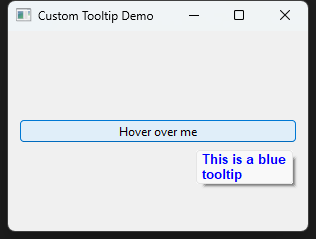

  ```python
  import sys
  from PyQt6.QtWidgets import QApplication, QWidget, QPushButton, QVBoxLayout, QToolTip
  from PyQt6.QtGui import QFont

  class CustomTooltipDemo(QWidget):
      def __init__(self):
          super().__init__()

          self.setWindowTitle("Custom Tooltip Demo")
          self.setGeometry(100, 100, 300, 200)

          # Set global font for tooltips
          QToolTip.setFont(QFont('SansSerif', 10))

          layout = QVBoxLayout()

          self.button = QPushButton("Hover over me")
          self.button.setToolTip("<b style='color:blue;'>This is a blue tooltip</b>")
          layout.addWidget(self.button)

          self.setLayout(layout)

  app = QApplication(sys.argv)
  window = CustomTooltipDemo()
  window.show()
  app.exec()

  ```


## Dialogs

- Standard GUI features — A file Open dialog

  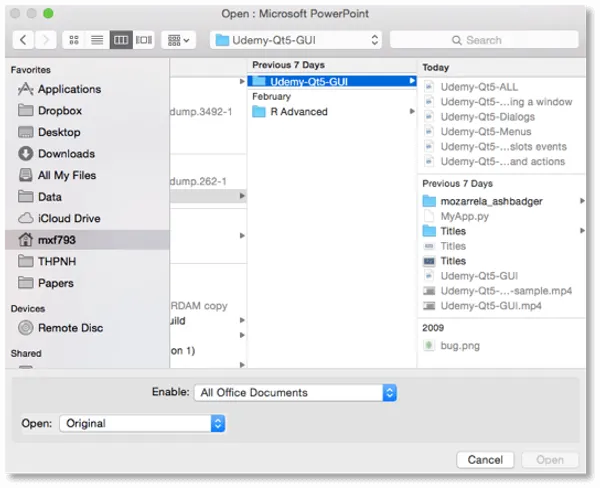


### Custom Dialog

- In Qt dialog boxes are handled by the `QDialog` class.
- To create a new dialog box simply create a new object of `QDialog` type passing in another widget, e.g. `QMainWindow`, as its parent.
  - This will make the `dialog` a modal window of `QMainWindow`. This means the **dialog will completely block interaction with the parent window**.
- Once we have created the dialog, we start it using `.exec()` - just like we did for `QApplication` to create the main `event loop` of our application.

* Example

  - The first step in creating a dialog button box is to define the buttons want to show, using namespace attributes from `QDialogButtonBox`.
  - The full list of buttons available is below.

  ```python
      - QMessageBox.StandardButton.Ok
      - QMessageBox.StandardButton.Open
      - QMessageBox.StandardButton.Save
      - QMessageBox.StandardButton.Cancel
      - QMessageBox.StandardButton.Close
      - QMessageBox.StandardButton.Discard
      - QMessageBox.StandardButton.Apply
      - QMessageBox.StandardButton.Reset
      - QMessageBox.StandardButton.RestoreDefaults
      - QMessageBox.StandardButton.Help
      - QMessageBox.StandardButton.SaveAll
      - QMessageBox.StandardButton.Yes
      - QMessageBox.StandardButton.YesToAll
      - QMessageBox.StandardButton.No
      - QMessageBox.StandardButton.NoToAll
      - QMessageBox.StandardButton.Abort
      - QMessageBox.StandardButton.Retry
      - QMessageBox.StandardButton.Ignore
      - QMessageBox.StandardButton.NoButton
  ```

  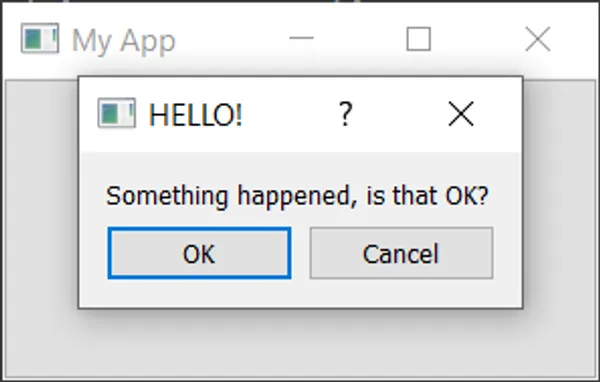

  ```python
  import sys
  from PyQt6.QtGui import QIcon
  from PyQt6.QtWidgets import QApplication, QDialog, QMainWindow, QPushButton,QDialogButtonBox,QVBoxLayout,QLabel, QMessageBox

  class CustomDialog(QDialog):
      def __init__(self, parent=None):
          super().__init__(parent)

          self.setWindowTitle("HELLO!")

          QBtn = QDialogButtonBox.StandardButton.Ok | QDialogButtonBox.StandardButton.Cancel

          self.buttonBox = QDialogButtonBox(QBtn)
          self.buttonBox.accepted.connect(self.accept)
          self.buttonBox.rejected.connect(self.reject)
          self.setWindowIcon(QIcon("../asset/utd/jpg"))

          self.layout = QVBoxLayout()
          message = QLabel("Something happened, is that OK?")
          self.layout.addWidget(message)
          self.layout.addWidget(self.buttonBox)
          self.setLayout(self.layout)


  class MainWindow(QMainWindow):
      def __init__(self):
          super().__init__()

          self.setWindowTitle("My App")

          button = QPushButton("Press me for a dialog!")
          button.clicked.connect(self.button_clicked)
          self.setCentralWidget(button)

      def button_clicked(self, s):
          print("click", s)

          dlg = CustomDialog(self)
          if dlg.exec():
              print("Success!")
          else:
              print("Cancel!")

  app = QApplication(sys.argv)

  window = MainWindow()
  window.show()

  app.exec()

  ```

* Another Example

  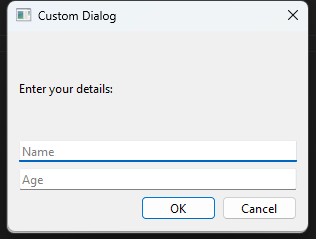

  ```python
  class CustomDialog(QDialog):
      def __init__(self):
          super().__init__()

          self.setWindowTitle("Custom Dialog")
          self.setGeometry(100, 100, 300, 200)

          layout = QVBoxLayout()

          self.label = QLabel("Enter your details:")
          layout.addWidget(self.label)

          self.name_input = QLineEdit()
          self.name_input.setPlaceholderText("Name")
          layout.addWidget(self.name_input)

          self.age_input = QLineEdit()
          self.age_input.setPlaceholderText("Age")
          layout.addWidget(self.age_input)

          self.buttons = QDialogButtonBox(QDialogButtonBox.StandardButton.Ok | QDialogButtonBox.StandardButton.Cancel)
          self.buttons.accepted.connect(self.accept)
          self.buttons.rejected.connect(self.reject)
          layout.addWidget(self.buttons)

          self.setLayout(layout)

      def accept(self):
          name = self.name_input.text()
          age = self.age_input.text()
          print(f"Name: {name}, Age: {age}")
          super().accept()

  class MainWindow(QWidget):
      def __init__(self):
          super().__init__()

          self.setWindowTitle("Main Window")
          self.setGeometry(100, 100, 300, 200)

          layout = QVBoxLayout()

          self.custom_dialog_btn = QPushButton("Open Custom Dialog")
          self.custom_dialog_btn.clicked.connect(self.open_custom_dialog)
          layout.addWidget(self.custom_dialog_btn)

          self.setLayout(layout)

      def open_custom_dialog(self):
          dialog = CustomDialog()
          if dialog.exec():
              print("Dialog accepted!")
          else:
              print("Dialog rejected!")

  ```


### `QMessageBox`

- Qt also provides a built-in message dialog class called `QMessageBox`. This can be used to create **`information`, `warning`, `about` or `question dialogs`.**

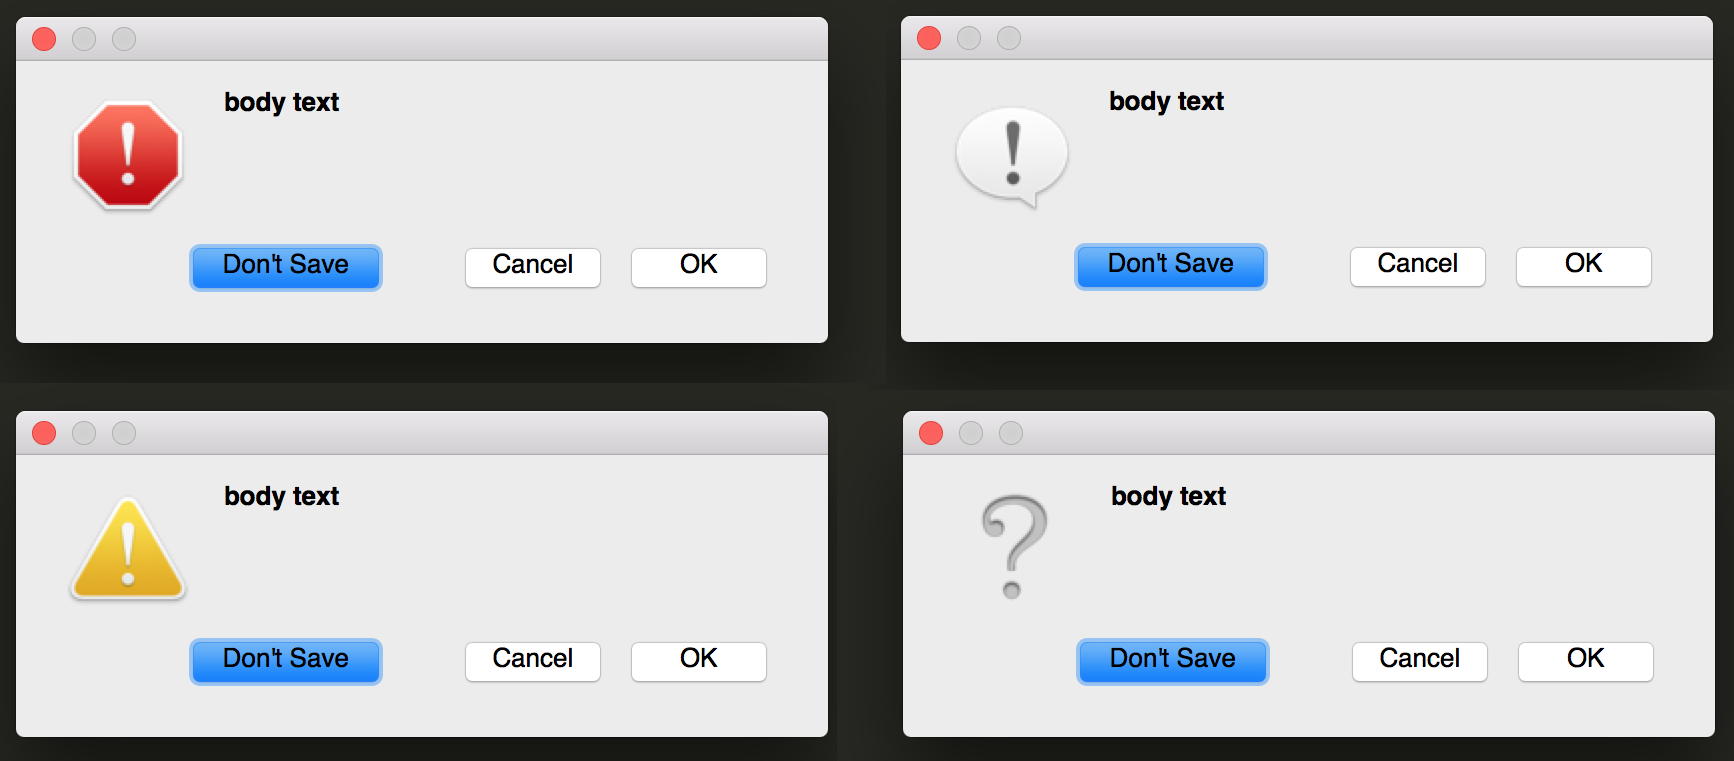

- You can also tweak the `icon` shown on the dialog by setting the icon with one of the following.

<table>
  <thead>
    <tr>
      <th>Icon state</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>QMessageBox.Icon.NoIcon</td>
      <td>The message box does not have an icon.</td>
    </tr>
    <tr>
      <td>QMessageBox.Icon.Question</td>
      <td>The message is asking a question.</td>
    </tr>
    <tr>
      <td>QMessageBox.Icon.Information</td>
      <td>The message is informational only.</td>
    </tr>
    <tr>
      <td>QMessageBox.Icon.Warning</td>
      <td>The message is warning.</td>
    </tr>
    <tr>
      <td>QMessageBox.Icon.Critical</td>
      <td>The message indicates a critical problem.</td>
    </tr>
  </tbody>
</table>

- The four `information`, `question`, `warning` and `critical` methods also accept optional buttons and defaultButton arguments which can be used to tweak the buttons shown on the dialog and select one by default.

  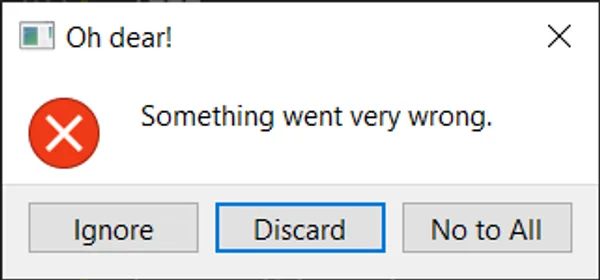

  ```python
  def button_clicked(self, s):

          button = QMessageBox.critical(
              self,
              "Oh dear!",
              "Something went very wrong.",
              buttons=QMessageBox.StandardButton.Discard | QMessageBox.StandardButton.NoToAll | QMessageBox.StandardButton.Ignore,
              defaultButton=QMessageBox.StandardButton.Discard,
          )

          if button == QMessageBox.StandardButton.Discard:
              print("Discard!")
          elif button == QMessageBox.StandardButton.NoToAll:
              print("No to all!")
          else:
              print("Ignore!")
  ```


- Another Example

  ```python
  class MessageBoxDemo(QWidget):
      def __init__(self):
          super().__init__()

          self.setWindowTitle("Message Box Demo")
          self.setGeometry(100, 100, 300, 200)

          layout = QVBoxLayout()

          self.info_btn = QPushButton("Show Information")
          self.info_btn.clicked.connect(self.show_information)
          layout.addWidget(self.info_btn)

          self.warning_btn = QPushButton("Show Warning")
          self.warning_btn.clicked.connect(self.show_warning)
          layout.addWidget(self.warning_btn)

          self.error_btn = QPushButton("Show Error")
          self.error_btn.clicked.connect(self.show_error)
          layout.addWidget(self.error_btn)

          self.question_btn = QPushButton("Show Question")
          self.question_btn.clicked.connect(self.show_question)
          layout.addWidget(self.question_btn)

          self.setLayout(layout)

      def show_information(self):
          QMessageBox.information(self, "Information", "This is an information message.")

      def show_warning(self):
          QMessageBox.warning(self, "Warning", "This is a warning message.")

      def show_error(self):
          QMessageBox.critical(self, "Error", "This is an error message.")

      def show_question(self):
          reply = QMessageBox.question(self, "Question", "Do you like PyQt6?", QMessageBox.StandardButton.Yes | QMessageBox.StandardButton.No)
          if reply == QMessageBox.StandardButton.Yes:
              print("User likes PyQt6!")
          else:
              print("User doesn't like PyQt6!")

  ```


### Input Dialogs

- Input dialogs are used to get input from the user. PyQt6 provides a simple way to create input dialogs using `QInputDialog`.

  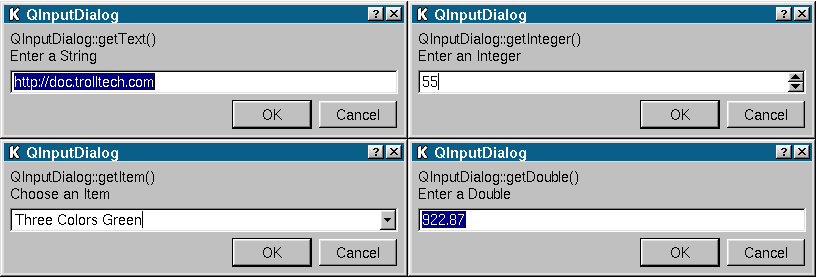

- Example

  ```python
  class InputDialogDemo(QWidget):
      def __init__(self):
          super().__init__()

          self.setWindowTitle("Input Dialog Demo")
          self.setGeometry(100, 100, 300, 200)

          layout = QVBoxLayout()

          self.text_btn = QPushButton("Get Text")
          self.text_btn.clicked.connect(self.get_text)
          layout.addWidget(self.text_btn)

          self.int_btn = QPushButton("Get Integer")
          self.int_btn.clicked.connect(self.get_integer)
          layout.addWidget(self.int_btn)

          self.double_btn = QPushButton("Get Double")
          self.double_btn.clicked.connect(self.get_double)
          layout.addWidget(self.double_btn)

          self.combo_btn = QPushButton("Get Combo Box Selection")
          self.combo_btn.clicked.connect(self.get_combobox_selection)
          layout.addWidget(self.combo_btn)

          self.setLayout(layout)

      def get_text(self):
          text, ok = QInputDialog.getText(self, "Input Text", "Enter your name:")
          if ok:
              print(f"Name: {text}")

      def get_integer(self):
          number, ok = QInputDialog.getInt(self, "Input Integer", "Enter your age:", 25, 0, 100, 1)
          if ok:
              print(f"Age: {number}")

      def get_double(self):
          number, ok = QInputDialog.getDouble(self, "Input Double", "Enter your salary:", 50000.0, 0, 1000000, 2)
          if ok:
              print(f"Salary: {number}")

      def get_combobox_selection(self):
          items = ["Option 1", "Option 2", "Option 3", "Option 4"]
          item, ok = QInputDialog.getItem(self, "Select an Option", "Options:", items, 0, False)
          if ok and item:
              print(f"Selected: {item}")
  ```


### File Dialogs

- File dialogs allow the user to select files or directories from the file system. PyQt6 provides `QFileDialog` for this purpose.

  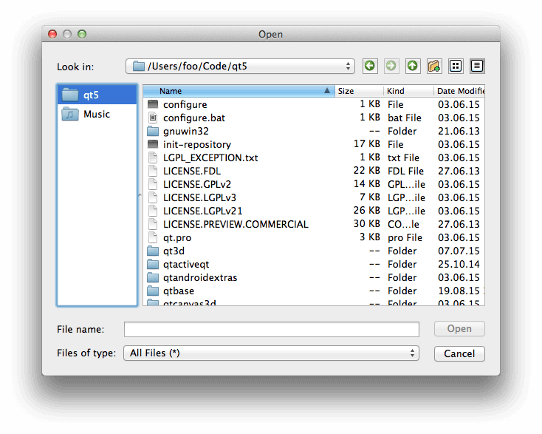

- Example

  ```python
  class FileDialogDemo(QWidget):
      def __init__(self):
          super().__init__()

          self.setWindowTitle("File Dialog Demo")
          self.setGeometry(100, 100, 300, 200)

          layout = QVBoxLayout()

          self.open_file_btn = QPushButton("Open File")
          self.open_file_btn.clicked.connect(self.open_file)
          layout.addWidget(self.open_file_btn)

          self.save_file_btn = QPushButton("Save File")
          self.save_file_btn.clicked.connect(self.save_file)
          layout.addWidget(self.save_file_btn)

          self.open_dir_btn = QPushButton("Open Directory")
          self.open_dir_btn.clicked.connect(self.open_directory)
          layout.addWidget(self.open_dir_btn)

          self.setLayout(layout)

      def open_file(self):
          file_name, _ = QFileDialog.getOpenFileName(self, "Open File", "", "All Files (*);;Text Files (*.txt)")
          if file_name:
              print(f"Selected File: {file_name}")

      def save_file(self):
          file_name, _ = QFileDialog.getSaveFileName(self, "Save File", "", "All Files (*);;Text Files (*.txt)")
          if file_name:
              print(f"File to Save: {file_name}")

      def open_directory(self):
          dir_name = QFileDialog.getExistingDirectory(self, "Open Directory", "")
          if dir_name:
              print(f"Selected Directory: {dir_name}")
  ```


## Menu and Toolbar

### Menu

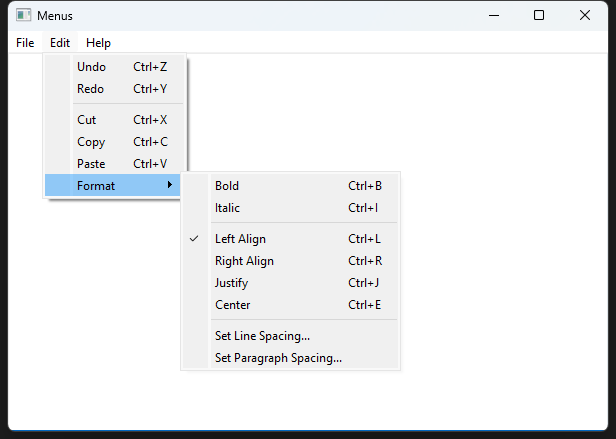

1. Creating the `Menu Bar`

- In PyQt6, the `QMainWindow` class provides a built-in method `menuBar()` to create a menu bar.

  ```python
  menubar = self.menuBar()
  ```

2. Adding Menus to the Menu Bar

   - Next, we create and add menus to the menu bar. Menus like "File", "Edit", and "Help" are common in many applications.

     ```python
     file_menu = menubar.addMenu('File')
     edit_menu = menubar.addMenu('Edit')
     help_menu = menubar.addMenu('Help')
     ```

3. Creating and Adding Actions

   - Actions are the building blocks of menus. An action in `PyQt6` is an instance of the `QAction` class.
   - We add actions to the `Edit` menu for common text-editing functions such as `Undo`, `Redo`, `Cut`, `Copy`, and `Paste`.
   - We also assign standard keyboard shortcuts using `QKeySequence`.

     ```python
     # Create actions for the Edit menu
     undo_action = QAction('Undo', self)
     undo_action.setShortcut(QKeySequence.StandardKey.Undo)
     edit_menu.addAction(undo_action)

     redo_action = QAction('Redo', self)
     redo_action.setShortcut(QKeySequence.StandardKey.Redo)
     edit_menu.addAction(redo_action)

     # Add separator
     edit_menu.addSeparator()

     cut_action = QAction('Cut', self)
     cut_action.setShortcut(QKeySequence.StandardKey.Cut)
     edit_menu.addAction(cut_action)

     copy_action = QAction('Copy', self)
     copy_action.setShortcut(QKeySequence.StandardKey.Copy)
     edit_menu.addAction(copy_action)

     paste_action = QAction('Paste', self)
     paste_action.setShortcut(QKeySequence.StandardKey.Paste)
     edit_menu.addAction(paste_action)
     ```

4. Adding a Submenu

   - `Submenus` are useful for organizing related actions under a common parent menu item.
   - For instance, the `Format` submenu under the `Edit` menu groups text formatting actions.

   ```python
   # Create Format submenu
   format_menu = QMenu('Format', self)
   edit_menu.addMenu(format_menu)
   ```

- Example

  ```python
  class MenuDemo(QMainWindow):
      def __init__(self):
          super().__init__()

          self.setWindowTitle("Menus")
          self.setGeometry(100, 100, 600, 400)

          # Create a central widget
          self.text_edit = QTextEdit()
          self.setCentralWidget(self.text_edit)

          # Create a menu bar
          menubar = self.menuBar()

          # Add File menu
          file_menu = menubar.addMenu('File')

          # Add Edit menu
          edit_menu = menubar.addMenu('Edit')

          # Add Help menu
          help_menu = menubar.addMenu('Help')

          # Add actions to the Edit menu
          undo_action = QAction('Undo', self)
          undo_action.setShortcut(QKeySequence.StandardKey.Undo)
          edit_menu.addAction(undo_action)

          redo_action = QAction('Redo', self)
          redo_action.setShortcut(QKeySequence.StandardKey.Redo)
          edit_menu.addAction(redo_action)

          edit_menu.addSeparator()

          cut_action = QAction('Cut', self)
          cut_action.setShortcut(QKeySequence.StandardKey.Cut)
          edit_menu.addAction(cut_action)

          copy_action = QAction('Copy', self)
          copy_action.setShortcut(QKeySequence.StandardKey.Copy)
          edit_menu.addAction(copy_action)

          paste_action = QAction('Paste', self)
          paste_action.setShortcut(QKeySequence.StandardKey.Paste)
          edit_menu.addAction(paste_action)

          # Add Format submenu to Edit menu
          format_menu = QMenu('Format', self)
          edit_menu.addMenu(format_menu)

          bold_action = QAction('Bold', self)
          bold_action.setShortcut('Ctrl+B')
          format_menu.addAction(bold_action)

          italic_action = QAction('Italic', self)
          italic_action.setShortcut('Ctrl+I')
          format_menu.addAction(italic_action)

          format_menu.addSeparator()

          left_align_action = QAction('Left Align', self)
          left_align_action.setShortcut('Ctrl+L')
          left_align_action.setCheckable(True)
          left_align_action.setChecked(True)
          format_menu.addAction(left_align_action)

          right_align_action = QAction('Right Align', self)
          right_align_action.setShortcut('Ctrl+R')
          right_align_action.setCheckable(True)
          format_menu.addAction(right_align_action)

          justify_action = QAction('Justify', self)
          justify_action.setShortcut('Ctrl+J')
          justify_action.setCheckable(True)
          format_menu.addAction(justify_action)

          center_action = QAction('Center', self)
          center_action.setShortcut('Ctrl+E')
          center_action.setCheckable(True)
          format_menu.addAction(center_action)

          format_menu.addSeparator()

          line_spacing_action = QAction('Set Line Spacing...', self)
          format_menu.addAction(line_spacing_action)

          paragraph_spacing_action = QAction('Set Paragraph Spacing...', self)
          format_menu.addAction(paragraph_spacing_action)

          self.show()
  ```


### The standard key in `QKeySequence`


In [15]:
import pandas as pd

pd.read_html("https://doc.qt.io/qt-6/qkeysequence.html")[5]

,StandardKey,Windows,Apple platforms,KDE Plasma,GNOME
0,HelpContents,F1,Ctrl+?,F1,F1
1,WhatsThis,Shift+F1,Shift+F1,Shift+F1,Shift+F1
2,Open,Ctrl+O,Ctrl+O,Ctrl+O,Ctrl+O
3,Close,"Ctrl+F4, Ctrl+W","Ctrl+W, Ctrl+F4",Ctrl+W,Ctrl+W
4,Save,Ctrl+S,Ctrl+S,Ctrl+S,Ctrl+S
...,...,...,...,...,...
65,DeleteCompleteLine,(none),(none),Ctrl+U,Ctrl+U
66,InsertParagraphSeparator,Enter,Enter,Enter,Enter
67,InsertLineSeparator,Shift+Enter,"Meta+Enter, Meta+O",Shift+Enter,Shift+Enter
68,Backspace,(none),"Delete, Meta+H",(none),(none)


### Toolbar

Toolbars are bars of `icons` and/or `text` used to perform common tasks within an application, for which accessing via a menu would be cumbersome.



1. Creating a Toolbar

   - The toolbar is created using the `QToolBar` class and added to the main window using `addToolBar()`.

   ```python
   toolbar = QToolBar("My main toolbar")
   self.addToolBar(toolbar)
   ```

2. Adding Actions to the Toolbar

   - Actions, represented by instances of `QAction`, are added to the toolbar.
   - These actions typically represent commands or functionalities accessible via toolbar buttons.

   ```python
   button_action = QAction(QIcon("./docs/PyQT/asset/utd.jpg"), "Your button", self)
   button_action.setStatusTip("This is your button")
   button_action.triggered.connect(self.onMyToolBarButtonClick)
   button_action.setCheckable(True)
   toolbar.addAction(button_action)
   ```

3. Adding Widgets to the Toolbar

   - Apart from actions, `widgets` can also be added to the toolbar using `addWidget()`.
   - In the provided script, a `QLabel` and a `QCheckBox` are added to the toolbar.

   ```python
   toolbar.addWidget(QLabel("Hello"))
   toolbar.addWidget(QCheckBox())
   ```

- Example

  ```python
  class MainWindow(QMainWindow):

     def __init__(self):
        super(MainWindow, self).__init__()

        self.setWindowTitle("My Awesome App")
        label = QLabel("Hello!")
        label.setAlignment(Qt.AlignmentFlag.AlignCenter)

        self.setCentralWidget(label)

        toolbar = QToolBar("My main toolbar")
        self.addToolBar(toolbar)

        button_action = QAction(QIcon("./docs/PyQT/asset/utd.jpg"),"Your button", self)
        button_action.setStatusTip("This is your button")
        button_action.triggered.connect(self.onMyToolBarButtonClick)
        button_action.setCheckable(True)
        toolbar.addAction(button_action)


        toolbar.addSeparator()

        button_action2 = QAction(QIcon("./docs/PyQT/asset/utd.jpg"), "Your &button2", self)
        button_action2.setStatusTip("This is your button2")
        button_action2.triggered.connect(self.onMyToolBarButtonClick)
        button_action2.setCheckable(True)
        toolbar.addAction(button_action2)

        toolbar.addWidget(QLabel("Hello"))
        toolbar.addWidget(QCheckBox())

        self.setStatusBar(QStatusBar(self))

     def onMyToolBarButtonClick(self, s):
        print("click", s)
  ```
